V.Harish
AIE22063
Lab Assignment 3(13/02/2024)

A1. Please refer to the “Purchase Data” worksheet of Lab Session1 Data.xlsx. Please load the data 
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following 
activities

In [4]:
import pandas as pd
df=pd.read_excel("C:\\Users\\HarishVReddy\\Downloads\\Lab Session1 Data.xlsx")      #reading excel file
print(df.iloc[:,:5])

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [5]:
A=df.iloc[:,1:4]        #extracting required data
C=df.iloc[:,4:5]        #extracting required data
print(A)
print(C)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4
   Payment (Rs)
0           386
1           289
2           393
3           110
4           280
5           167
6           271
7           274
8           148
9           198


A.What is the dimensionality of the vector space for this data?

In [7]:
print("Dimensionality:",A.shape[1])     #number of features 

Dimensionality: 3


B.How many vectors exist in this vector space?

In [8]:
print("Vectors in the vector space:",A.shape[0])        #number of examples

Vectors in the vector space: 10


C.What is the rank of Matrix A?

In [9]:
from numpy.linalg import matrix_rank
print("Rank of Matrix A:",matrix_rank(A))       #rank

Rank of Matrix A: 3


D. Using Pseudo-Inverse find the cost of each product available for sale. 
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a 
pseudo-inverse.)

In [10]:
from numpy.linalg import pinv
Ainv=pinv(A, rcond=1e-15, hermitian=False)      #Matrix A is non-square matrix,so pinv is used
print(Ainv)

[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products 
available with the vendor.

In [11]:
import numpy as np
print("X:",np.dot(Ainv,C))      #AX=C --> X=pinv(A).C

X: [[ 1.]
 [55.]
 [18.]]


A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on 
purchase behavior.

In [12]:
df['Category'] = ['Rich' if payment > 200 else 'Poor' for payment in df['Payment (Rs)']]        #categorising 'Rich' or 'Poor' based on payment
print(df["Category"])

0    Rich
1    Rich
2    Rich
3    Poor
4    Rich
5    Poor
6    Rich
7    Rich
8    Poor
9    Poor
Name: Category, dtype: object


A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the 
following after loading the data to your programming platform.

In [13]:
df1=pd.read_excel("C:\\Users\\HarishVReddy\\Downloads\\Lab Session 2 Data.xlsx")
print(df1.iloc[:250,:9])

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

1.Calculate the mean and variance of the Price data present in column D. 
(Suggestion: if you use Python, you may use statistics.mean() & statistics.variance() methods).

In [14]:
import statistics

print("Mean of column D",statistics.mean(df1.iloc[:,4]))        #mean using statistics.mean
print("Variance of column D",statistics.variance(df1.iloc[:,4]))        #variance using statistics.variance

Mean of column D 1560.9654618473896
Variance of column D 58847.91708859632


2.Select the price data for all Wednesdays and calculate the sample mean. Compare the mean 
with the population mean and note your observations.

In [15]:
wednesday_df = df1[df1['Day'] == 'Wed']     #extracting the data for which day='Wed'
wednesday_mean = statistics.mean(wednesday_df['Price'])     #mean of data that has day='Wed'
population_mean = statistics.mean(df1['Price'])     #mean of all the data

print('Wednesday Mean:', wednesday_mean)
print('Population Mean:', population_mean)

Wednesday Mean: 1550.706
Population Mean: 1560.663453815261


3.Select the price data for the month of Apr and calculate the sample mean. Compare the 
mean with the population mean and note your observations.

In [16]:
April_df = df1[df1['Month'] == 'Apr']       #extracting particular data for which month='Apr'
April_mean = statistics.mean(April_df['Price'])     #mean of data that has month='April'
population_mean = statistics.mean(df1['Price'])     #mean of entire data
print('April Mean:', April_mean)
print('Population Mean:', population_mean)

April Mean: 1698.9526315789474
Population Mean: 1560.663453815261


4.From the Chg% (available in column I) find the probability of making a loss over the stock. 
(Suggestion: use lambda function to find negative values)

In [17]:
l2 = list(map(lambda v: v < 0, df1['Chg%']))        #lambda function to check if the value in the 'Chg%' column is less than 0 
l2_false = [value for value in l2 if value is False]        #sorting to get only the false values
negative_probability = (len(l2_false) / len(l2))*100         #probability of negative values
print(f'Probability: {negative_probability}%')

Probability: 50.20080321285141%


5.Calculate the probability of making a profit on Wednesday.
Calculate the conditional probability of making profit, given that today is Wednesday

In [18]:
l3 = list(map(lambda v: v > 0, wednesday_df['Chg%']))       #lambda function to check if the value in the 'Chg%' column is greater than 0 
l3_True = [value for value in l3 if value is True]          #sorting to get only the true values

positive_probability = (len(l3_True) / len(l3))*100              #probability of positive changes
conditional_prob = positive_probability / wednesday_df.shape[0]

print(f'profits on wednesday: {positive_probability}%')
print(f'conditional probability: {conditional_prob}%')

profits on wednesday: 42.0%
conditional probability: 0.84%


6.Make a scatter plot of Chg% data against the day of the week

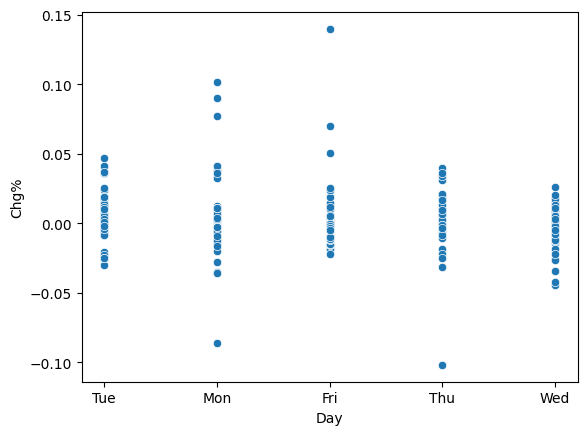

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Day', y='Chg%', data=df1)        #scatter plot of 'Chg%' data against the day of the week
plt.show()